In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

Чтение датасета

In [96]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,item_id,receipt_id,device_id,local_date,barcode,price,quantity,region
0,0,11660931229,7364786357,352402250963288,2021-02-02 00:00:01,46200310,133.0,1.0,Нижегородская область
1,1,11660931230,7364786357,352402250963288,2021-02-02 00:00:01,4601501425437,100.0,1.0,Нижегородская область
2,2,11660931245,7364786362,352403362581574,2021-02-02 00:00:04,NaN,50.0,1.0,Москва
3,3,11660931313,7364786391,352399468048288,2021-02-02 01:00:11,NaN,29.0,1.0,Ульяновская область
4,4,11660931336,7364786406,352401023174844,2021-02-02 00:00:17,NaN,250.0,1.0,Москва
...,...,...,...,...,...,...,...,...,...
2246089,2246089,11660931038,7364786218,352405756881967,2021-02-01 23:59:35,46221599,105.0,1.0,Воронежская область
2246090,2246090,11660931098,7364786258,352400866634268,2021-02-01 23:59:46,NaN,1700.0,0.1,Краснодарский край
2246091,2246091,11660931118,7364786270,352402818554872,2021-02-01 23:59:42,46204837,135.0,1.0,Москва
2246092,2246092,11660931119,7364786270,352402818554872,2021-02-01 23:59:42,2000000000015,32.0,0.5,Москва


### Выбираем один вид банки кока-колы

In [82]:
df['barcode'].value_counts()

barcode
2000000000008    8347
2000000000015    4672
4606203098903    4417
2000000000022    4229
2000000000039    3969
                 ... 
2100303003604       1
6932501701046       1
6939962748702       1
4014870000660       1
4607029053251       1
Name: count, Length: 156857, dtype: int64

In [83]:
coca_cola_barcode = ['2000000000008']
cola_df = df[df['barcode'].isin(coca_cola_barcode)]
cola_df

,Unnamed: 0,item_id,receipt_id,device_id,local_date,barcode,price,quantity,region
26,26,11660932086,7364786864,352399472211233,2021-02-02 00:01:43,2000000000008,150.0,1.0,Москва
426,426,11647057301,7356681152,352405133338198,2021-02-01 02:08:47,2000000000008,4.0,4.0,Ямало-Ненецкий автономный округ
565,565,11647062239,7356684473,352402818554872,2021-02-01 00:19:36,2000000000008,26.0,1.0,Москва
829,829,11724229017,7400564811,352405190581318,2021-02-06 09:29:52,2000000000008,53.0,2.0,Ханты-Мансийский автономный округ
1182,1182,11669341030,7369581476,352402818554872,2021-02-02 14:17:36,2000000000008,26.0,3.0,Москва
...,...,...,...,...,...,...,...,...,...
2243982,2243982,11660832796,7364723884,352406548440871,2021-02-02 00:14:20,2000000000008,80.0,1.0,Оренбургская область
2244703,2244703,11660864416,7364742538,352401457619797,2021-02-02 02:41:11,2000000000008,119.0,1.0,Алтайский край
2245096,2245096,11660885556,7364755567,352405604088706,2021-02-01 22:58:32,2000000000008,5.0,1.0,Воронежская область
2245354,2245354,11660899240,7364765764,352402818554872,2021-02-01 23:09:38,2000000000008,26.0,1.0,Москва


# EDA

### Удаляем нецелые и отрицальные значения quantity

In [84]:
cola_df = cola_df[(cola_df['quantity'].apply(lambda x: x.is_integer())) & (cola_df['quantity'] > 0)]
cola_df

,Unnamed: 0,item_id,receipt_id,device_id,local_date,barcode,price,quantity,region
26,26,11660932086,7364786864,352399472211233,2021-02-02 00:01:43,2000000000008,150.0,1.0,Москва
426,426,11647057301,7356681152,352405133338198,2021-02-01 02:08:47,2000000000008,4.0,4.0,Ямало-Ненецкий автономный округ
565,565,11647062239,7356684473,352402818554872,2021-02-01 00:19:36,2000000000008,26.0,1.0,Москва
829,829,11724229017,7400564811,352405190581318,2021-02-06 09:29:52,2000000000008,53.0,2.0,Ханты-Мансийский автономный округ
1182,1182,11669341030,7369581476,352402818554872,2021-02-02 14:17:36,2000000000008,26.0,3.0,Москва
...,...,...,...,...,...,...,...,...,...
2243982,2243982,11660832796,7364723884,352406548440871,2021-02-02 00:14:20,2000000000008,80.0,1.0,Оренбургская область
2244703,2244703,11660864416,7364742538,352401457619797,2021-02-02 02:41:11,2000000000008,119.0,1.0,Алтайский край
2245096,2245096,11660885556,7364755567,352405604088706,2021-02-01 22:58:32,2000000000008,5.0,1.0,Воронежская область
2245354,2245354,11660899240,7364765764,352402818554872,2021-02-01 23:09:38,2000000000008,26.0,1.0,Москва


### Удаляем отрицальные значения price

In [85]:
cola_df = cola_df[cola_df['price'] > 0]
cola_df

,Unnamed: 0,item_id,receipt_id,device_id,local_date,barcode,price,quantity,region
26,26,11660932086,7364786864,352399472211233,2021-02-02 00:01:43,2000000000008,150.0,1.0,Москва
426,426,11647057301,7356681152,352405133338198,2021-02-01 02:08:47,2000000000008,4.0,4.0,Ямало-Ненецкий автономный округ
565,565,11647062239,7356684473,352402818554872,2021-02-01 00:19:36,2000000000008,26.0,1.0,Москва
829,829,11724229017,7400564811,352405190581318,2021-02-06 09:29:52,2000000000008,53.0,2.0,Ханты-Мансийский автономный округ
1182,1182,11669341030,7369581476,352402818554872,2021-02-02 14:17:36,2000000000008,26.0,3.0,Москва
...,...,...,...,...,...,...,...,...,...
2243982,2243982,11660832796,7364723884,352406548440871,2021-02-02 00:14:20,2000000000008,80.0,1.0,Оренбургская область
2244703,2244703,11660864416,7364742538,352401457619797,2021-02-02 02:41:11,2000000000008,119.0,1.0,Алтайский край
2245096,2245096,11660885556,7364755567,352405604088706,2021-02-01 22:58:32,2000000000008,5.0,1.0,Воронежская область
2245354,2245354,11660899240,7364765764,352402818554872,2021-02-01 23:09:38,2000000000008,26.0,1.0,Москва


### Принудительно изменяем тип данных local_date на datetime для дальнейшей работы

In [86]:
cola_df.dtypes

Unnamed: 0      int64
item_id         int64
receipt_id      int64
device_id       int64
local_date     object
barcode        object
price         float64
quantity      float64
region         object
dtype: object

In [87]:
cola_df["local_date"] = pd.to_datetime(cola_df["local_date"], errors="coerce")

In [88]:
print(cola_df["local_date"].isna().sum())

0


### Агрегируем данные по региону и часу

In [70]:
cola_df['hour'] = cola_df['local_date'].dt.hour
cola_df['date'] = cola_df['local_date'].dt.date
sales_agg = cola_df.groupby(["region", "date", "hour"], as_index=False)["quantity"].sum()

In [71]:
sales_agg['weekday'] = pd.to_datetime(sales_agg['date']).dt.weekday
sales_agg["is_weekend"] = sales_agg["weekday"].isin([5, 6]).astype(int)

In [72]:
sales_agg

,region,date,hour,quantity,weekday,is_weekend
0,Алтайский край,2021-02-01,6,3.0,0,0
1,Алтайский край,2021-02-01,8,1.0,0,0
2,Алтайский край,2021-02-01,9,1.0,0,0
3,Алтайский край,2021-02-01,11,3.0,0,0
4,Алтайский край,2021-02-01,12,12.0,0,0
...,...,...,...,...,...,...
2330,Ярославская область,2021-02-06,18,1.0,5,1
2331,Ярославская область,2021-02-06,19,1.0,5,1
2332,Ярославская область,2021-02-06,20,1.0,5,1
2333,Ярославская область,2021-02-06,22,3.0,5,1


### Разбиваем на тренировочную и тестовую выборки

In [73]:
train = sales_agg[sales_agg['date'] < sales_agg['date'].max()]
test = sales_agg[sales_agg['date'] == sales_agg['date'].max()]

In [75]:
features = ['hour', 'weekday','is_weekend']
X_train, X_test, y_train, y_test = train_test_split(train[features], train['quantity'], test_size=0.2, random_state=42)

### Обучаем RandomForestRegressor

In [76]:
model = RandomForestRegressor(n_estimators = 100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Считаем ошибки и строим предсказание на сутки по всем регионам

In [77]:
preds = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test,preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test,preds)))

MAE: 4.532526402439902
RMSE: 12.729390423079103


In [78]:
future_hours = pd.DataFrame({"hour": np.arange(24), "weekday": sales_agg["weekday"].max(), "is_weekend": 0})
predicted_sales = model.predict(future_hours)

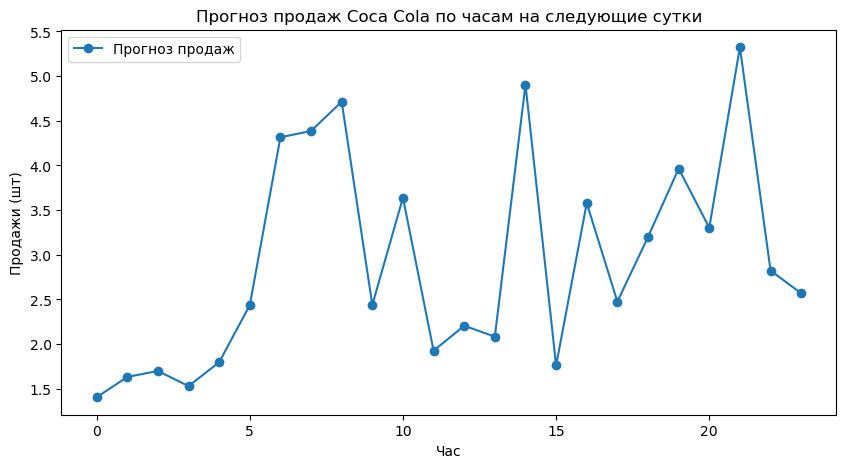

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(future_hours["hour"], predicted_sales, marker="o", label="Прогноз продаж")
plt.xlabel("Час")
plt.ylabel("Продажи (шт)")
plt.title("Прогноз продаж Coca Cola по часам на следующие сутки")
plt.legend()
plt.show()

### Считаем ошибки и строим предсказание на сутки по каждому региону отдельно

In [105]:
predicted_sales_by_region = {}
for region in sales_agg["region"].unique():
    region_train = train[train["region"] == region]
    X_train = region_train[features]
    y_train = region_train["quantity"]
    
    # Пропускать регион, если слишком мало данных
    if len(region_train) < 5:
        print(f"Недостаточно данных для региона {region}. Пропуск обучения.")
        continue

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    future_hours = pd.DataFrame({
        "hour": np.tile(np.arange(24), len(region_train["region"].unique())),
        "weekday": sales_agg["weekday"].max(),
        "is_weekend": 0
    })
    future_hours["region"] = region
    
    predicted_sales_by_region[region] = model.predict(future_hours[["hour", "weekday", "is_weekend"]])

Недостаточно данных для региона Брянская область. Пропуск обучения.
Недостаточно данных для региона Ивановская область. Пропуск обучения.
Недостаточно данных для региона Республика Калмыкия. Пропуск обучения.
Недостаточно данных для региона Республика Мордовия. Пропуск обучения.
Недостаточно данных для региона Республика Саха (Якутия). Пропуск обучения.
Недостаточно данных для региона Севастополь. Пропуск обучения.
Недостаточно данных для региона Ульяновская область. Пропуск обучения.


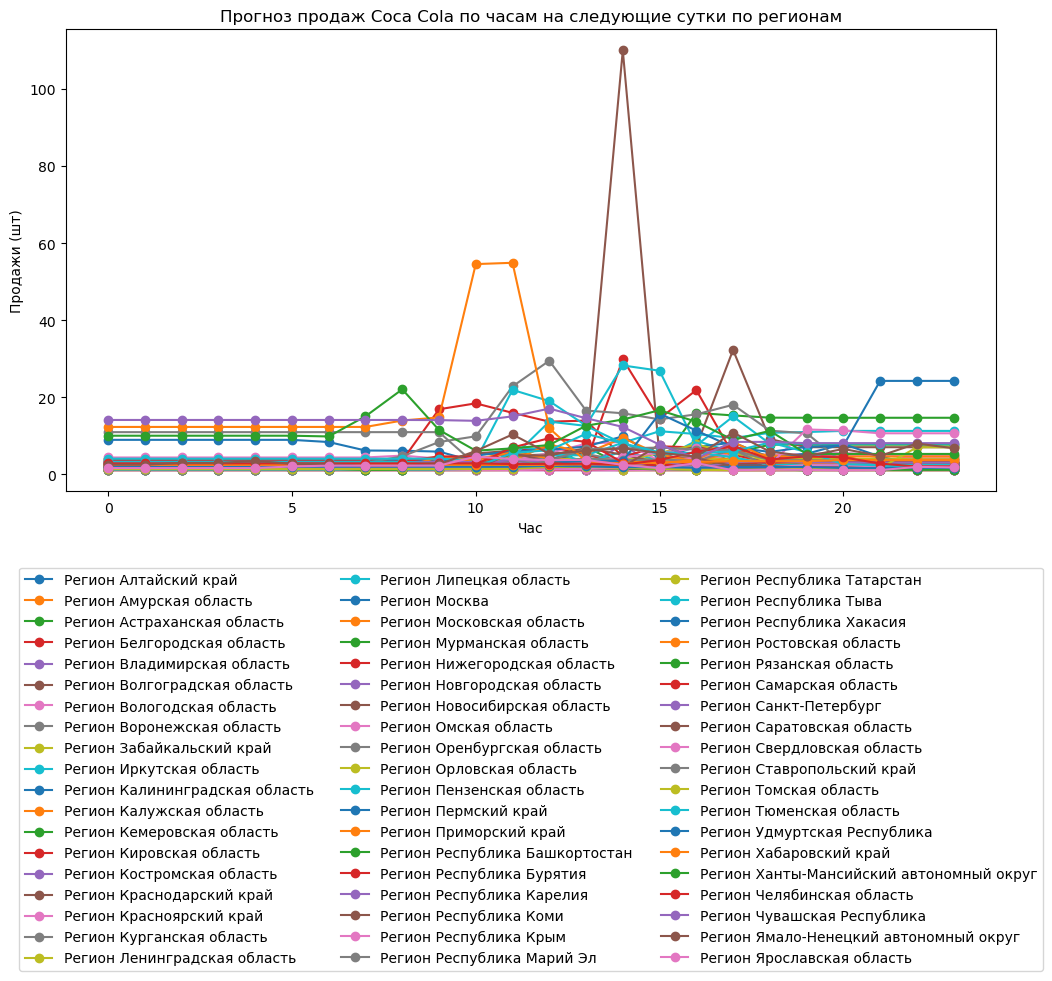

In [107]:
plt.figure(figsize=(12, 6))
for region, predicted_sales in predicted_sales_by_region.items():
    plt.plot(np.arange(24), predicted_sales, marker="o", label=f"Регион {region}")

plt.xlabel("Час")
plt.ylabel("Продажи (шт)")
plt.title("Прогноз продаж Coca Cola по часам на следующие сутки по регионам")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)